In [51]:
import os

import sklearn
import skimage
import numpy as np
import tifffile
import matplotlib.pyplot as plt

In [3]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

In [4]:
plt.rcParams['figure.dpi'] = 220

In [5]:
# !conda install -c conda-forge scikit-learn seaborn -y

In [6]:
fp = '../data/examples/degas.png'
img = skimage.io.imread(fp)

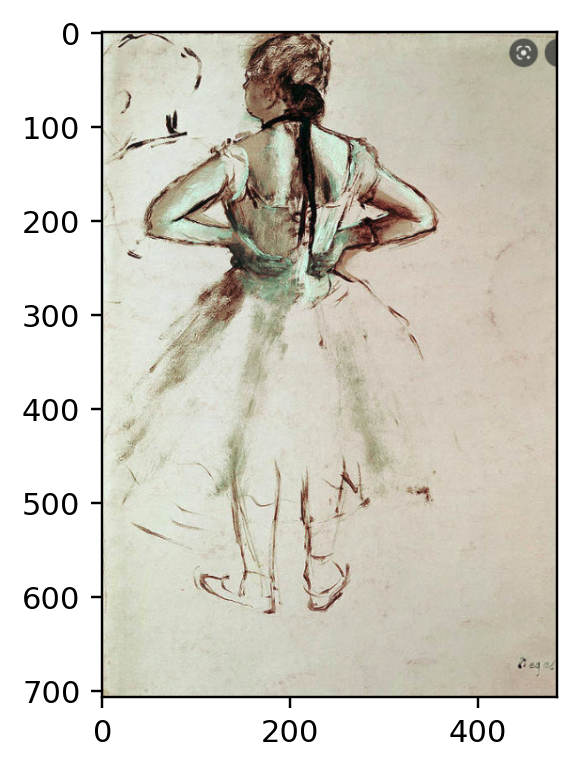

In [7]:
plt.imshow(img)

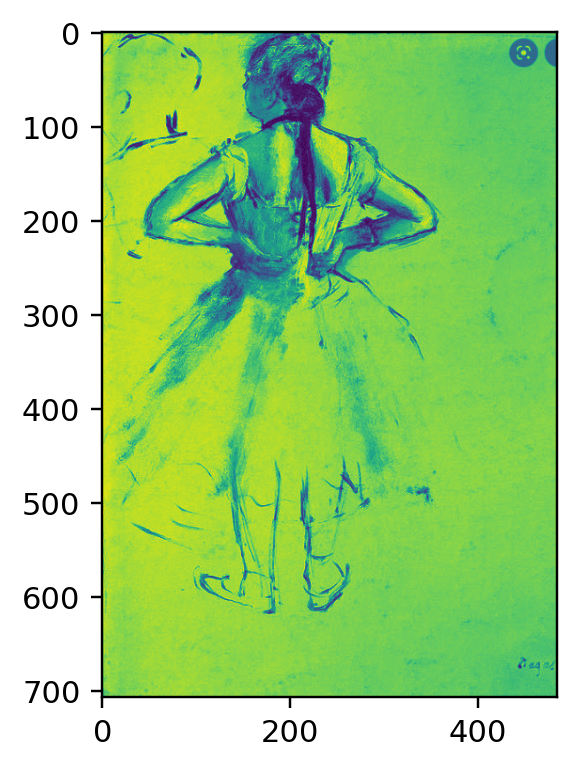

In [8]:
rgb = skimage.color.rgba2rgb(img)
gray = skimage.color.rgb2gray(rgb)
plt.imshow(gray)

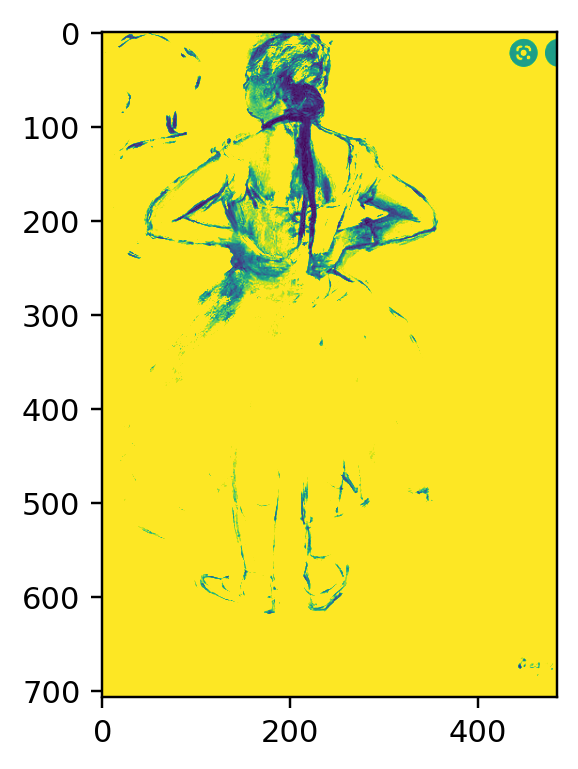

In [43]:
plt.imshow(gray, vmax=.6)

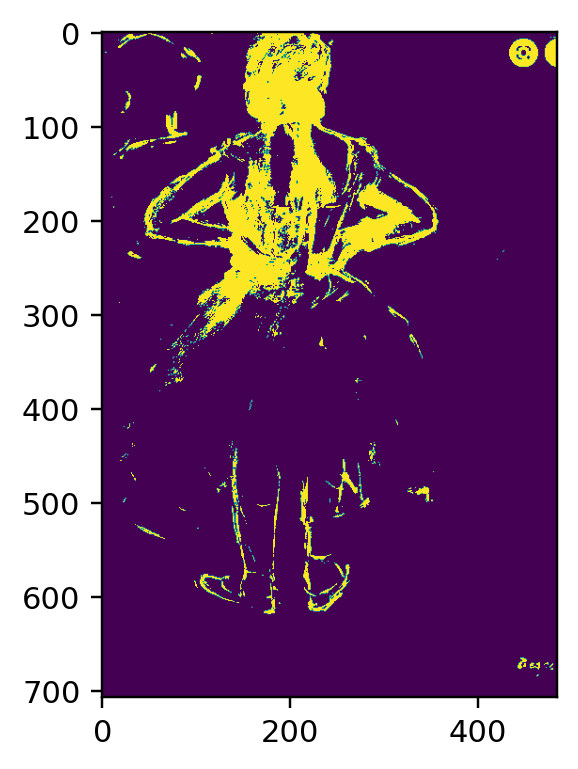

In [47]:
mask = gray < .6
new = np.zeros_like(mask)
new[mask] = 1.
plt.imshow(new)

In [52]:
tifffile.imsave('../data/examples/degas_mask.tif', new)

In [53]:
tifffile.imsave('../data/examples/degas_gray.tif', gray)

In [10]:
def load_svg(fp):
    drawing = svg2rlg(fp)
    renderPM.drawToFile(drawing, "tmp.png", fmt="PNG", )
    return skimage.io.imread('tmp.png')

In [36]:
l1 = skimage.color.rgb2gray(load_svg('../data/cross_hatching/v1/1.svg'))
l2 = skimage.color.rgb2gray(load_svg('../data/cross_hatching/v1/2.svg'))
l3 = skimage.color.rgb2gray(load_svg('../data/cross_hatching/v1/3.svg'))

In [40]:
def convert_img(img, cross_hatch_imgs, thresholds):
    new = np.ones_like(img)
    
    for i, (cross_img, thresh) in enumerate(zip(cross_hatch_imgs, thresholds)):
        if not i:
            mask = (img >= 0) & (img < thresh)
        else:
            mask = (img >= thresholds[i-1]) & (img < thresh)
        
        new[mask] = cross_img[:img.shape[0], :img.shape[1]][mask]
    
    return new

In [41]:
cross = convert_img(gray, [l3, l2, l1], [.1, .3, .6])

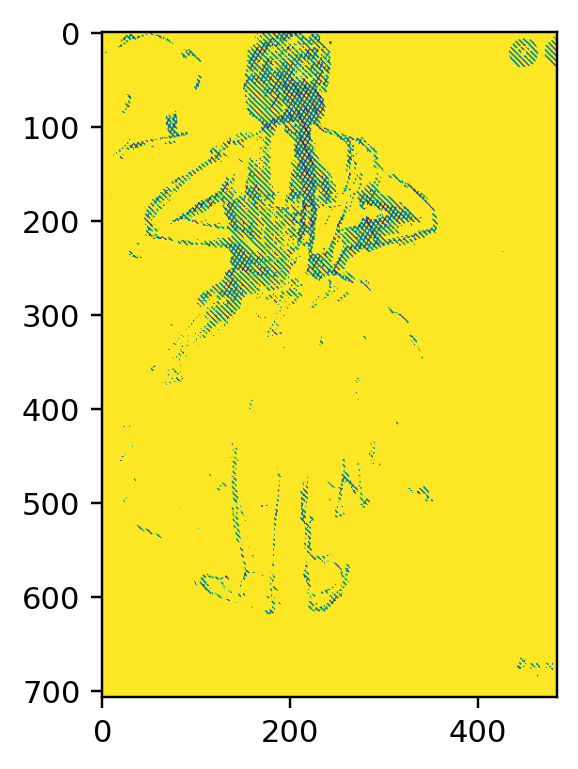

In [42]:
plt.imshow(cross)